<a href="https://colab.research.google.com/github/zahidhamidi/ML-Project/blob/main/NegEx_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install stanza
# !pip install spacy_stanza
# !pip install negspacy
# !pip install negex
# !pip install negfinder
# !pip install negexpander
!pip install spacy-pipeline-negex



ERROR: Could not find a version that satisfies the requirement spacy-pipeline-negex (from versions: none)
ERROR: No matching distribution found for spacy-pipeline-negex


In [2]:
import spacy # to build a nlp pipeline
import stanza # for named entity recognition
# this package wraps Stanza around Spacy, so that we can use Stanza in a spaCy pipeline.
import spacy_stanza
from negspacy.negation import Negex
from negspacy.termsets import termset # to customize negation terms
import pandas as pd
from tqdm.auto import tqdm
nlp = spacy.load("en_core_web_sm")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your CSV dataset
df = pd.read_csv("true_positive_experimentation.csv")

## **RBM #1 : NegEx**

In [4]:
# download and initialize a mimic pipeline with an i2b2 NER model
# stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = spacy_stanza.load_pipeline('en', package='mimic', processors={'ner': 'i2b2'})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | i2b2    |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [5]:
# nlp.add_pipe("negex", config={"ent_types":["PROBLEM","TEST",'TREATMENT']})

In [6]:
# nlp = spacy.load("en_core_sci_sm")
# import spacy
# from spacy.pipeline.negex import NegexComponent

# nlp = spacy.load("en_core_sci_sm")
# negex = NegexComponent(config={"chunk_prefix": ["no", "none", "not", "nor", "without"]})
# nlp.add_pipe(negex)


In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load spaCy model with the NegEx component
# nlp = spacy.load("en_core_sci_sm")
nlp.add_pipe("negex", config={"chunk_prefix": ["no", "none", "not", "nor", "without"]})

# Initialize an empty list to store predictions
predictions = []

# Iterate through the text in your DataFrame
for text in tqdm(df["doc_text_original"]):
    # Process the text with SpaCy
    doc = nlp(text)

    # Initialize a variable to track whether the sentence contains negations
    contains_negation = False

    # Iterate through sentences and check for negations
    for sent in doc.sents:
        for ent in sent.ents:
            if ent._.negex:
                contains_negation = True
                break

    # Determine the final classification (0 for negation, 1 for non-negation)
    prediction = 0 if contains_negation else 1
    predictions.append(prediction)

# Add the predictions as a new column in the dataframe
df['predicted'] = predictions


In [ ]:
# Assuming you have loaded your DataFrame 'df' with the columns 'label_code' and 'predicted_label_code'
y_true = df['label_code']
y_pred = df['predicted']

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


## **RBM #2 : Filter with negation terms**

In [30]:
import spacy
import pandas as pd

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define the negation terms
negation_terms = ["no", "none", "not", "nor", "without"]

# Your DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv("your_dataset.csv")

# Define a function for negation detection
def detect_negation(text):
    # Process the text with SpaCy
    doc = nlp(text)

    # Initialize a variable to track whether negation is detected
    negation_detected = False

    # Iterate through the tokens and check for negation terms
    for token in doc:
        if token.text.lower() in negation_terms:
            negation_detected = True
            break

    return negation_detected

# Apply the negation detection function to each text in the DataFrame
df["predicted"] = df["doc_text_original"].apply(detect_negation)

# Map the negation detection result to 0 (negation) or 1 (non-negation)
df["predicted"] = df["predicted"].astype(int)



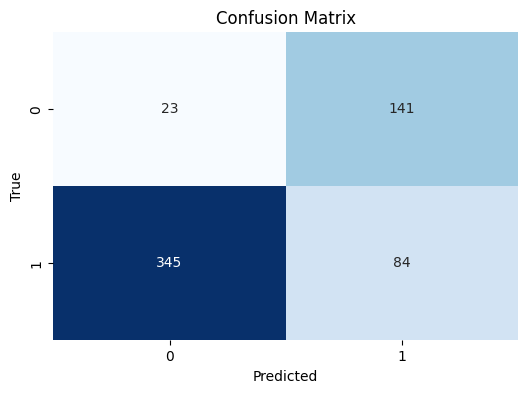

Accuracy: 0.18
Precision: 0.37
Recall: 0.20
F1 Score: 0.26


In [31]:
# Assuming you have loaded your DataFrame 'df' with the columns 'label_code' and 'predicted_label_code'
y_true = df['label_code']
y_pred = df['predicted']

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


## **RBM #3 : NegFinder**

In [12]:
# !pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660332 sha256=e67c144a00e6a5d3f9953de598ce1881b654e372b77b40bf1283ae8f7fc68ed7
  Stored in directory: /root/.cache/pip/wheels/d6/5d/cd/0752b58bc0a19cb9465c6db6e7a4e7c490c6f6cece8f8f6bcf
Successfully built en-core-sci-sm
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Un

In [10]:
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from negspacy.negation import Negex

In [14]:
nlp0 = spacy.load("en_core_sci_sm")
# nlp1 = spacy.load("en_ner_bc5cdr_md")

In [16]:
clinical_note = "Patient resting in bed. Patient given azithromycin without any difficulty. Patient has audible wheezing, \
states chest tightness. No evidence of hypertension.\
Patient denies nausea at this time. zofran declined. Patient is also having intermittent sweating associated with pneumonia. \
Patient refused pain but tylenol still given. Neither substance abuse nor alcohol use however cocaine once used in the last year. Alcoholism unlikely.\
Patient has headache and fever. Patient is not diabetic. \
No signs of diarrhea. Lab reports confirm lymphocytopenia. Cardaic rhythm is Sinus bradycardia. \
Patient also has a history of cardiac injury. No kidney injury reported. No abnormal rashes or ulcers. \
Patient might not have liver disease. Confirmed absence of hemoptysis. Although patient has severe pneumonia and fever \
, test reports are negative for COVID-19 infection. COVID-19 viral infection absent."

In [21]:
# Lemmatizing the notes to capture all forms of negation (e.g., deny: denies, denying)
def lemmatize(note, nlp):
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

# Assuming you have a clinical note text stored in 'clinical_note'
# clinical_note = "Your clinical note text goes here."

# Create a spaCy language model (nlp0) for lemmatization
nlp0 = spacy.load("en_core_sci_sm")

# Lemmatize the clinical note
lem_clinical_note = lemmatize(clinical_note, nlp0)

# Creating a doc object using the BC5CDR model (nlp1)
nlp0 = spacy.load("en_core_sci_sm")
doc = nlp0(lem_clinical_note)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [22]:
#function to modify options for displacy NER visualization
def get_entity_options():
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {'DISEASE': 'linear-gradient(180deg, #66ffcc, #abf763)', 'CHEMICAL': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', "NEG_ENTITY":'linear-gradient(90deg, #ffff66, #ff6600)'}
    options = {"ents": entities, "colors": colors}
    return options
options = get_entity_options()
#visualizing identified Named Entities in clinical input text
displacy.render(doc, style='ent', options=options)

'<div class="entities" style="line-height: 2.5; direction: ltr">your clinical note text go here .</div>'

In [27]:
import spacy
from negspacy.negex import Negex

# Adding a new pipeline component to identify negation
def neg_model(nlp_model):
    nlp = spacy.load(nlp_model, disable=['parser'])
    nlp.add_pipe('sentencizer')
    negex = Negex(nlp, name="negex", neg_termset=None, ent_types=None, extension_name=None, chunk_prefix=["no", "none", "not", "nor", "without"])
    nlp.add_pipe(negex, last=True)  # Add the 'negex' component last in the pipeline
    return nlp

# Function for handling negation
def negation_handling(nlp_model, note, neg_model):
    results = []
    nlp = neg_model(nlp_model)
    note = note.split(".")  # Sentence tokenizing based on delimiter
    note = [n.strip() for n in note]  # Removing extra spaces at the beginning and end of sentences
    for t in note:
        doc = nlp(t)
        for e in doc.ents:
            rs = str(e._.negex)
            if rs == "True":
                results.append(e.text)
    return results

# List of negative concepts from clinical note identified by negspacy
results0 = negation_handling("en_core_sci_sm", lem_clinical_note, neg_model)


ModuleNotFoundError: ignored

In [ ]:
#function to identify span objects of matched megative phrases from clinical note
def match(nlp,terms,label):
        patterns = [nlp.make_doc(text) for text in terms]
        matcher = PhraseMatcher(nlp.vocab)
        matcher.add(label, None, *patterns)
        return matcher
#replacing the labels for identified negative entities
def overwrite_ent_lbl(matcher, doc):
    matches = matcher(doc)
    seen_tokens = set()
    new_entities = []
    entities = doc.ents
    for match_id, start, end in matches:
        if start not in seen_tokens and end - 1 not in seen_tokens:
            new_entities.append(Span(doc, start, end, label=match_id))
            entities = [
                e for e in entities if not (e.start < end and e.end > start)
            ]
            seen_tokens.update(range(start, end))
doc.ents = tuple(entities) + tuple(new_entities)
    return doc
matcher = match(nlp1, results0,"NEG_ENTITY")
#doc0: new doc object with added "NEG_ENTITY label"
doc0 = overwrite_ent_lbl(matcher,doc)
#visualizing identified Named Entities in clinical input text
displacy.render(doc0, style='ent', options=options)

In [ ]:
#function to add custom negation terms to the existing model
def neg_model2(nlp_model):
    nlp = spacy.load(nlp_model, disable = ['parser'])
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    negex = Negex(nlp)

    negex.preceding_patterns += [nlp('deny'), nlp('refuse'), nlp('neither'), nlp('nor')]
    negex.following_patterns += [nlp('absent'), nlp('deny'), nlp('decline')]
    preceding_update  = [i.text for i in negex.preceding_patterns]
    following_update = [i.text for i in negex.following_patterns]

    negex = Negex(nlp, preceding_negations = preceding_update, following_negations= following_update)
    nlp.add_pipe(negex)
    return nlp
#updated list of all the negative concepts from clinical note identified by negspacy
results1 = negation_handling("en_ner_bc5cdr_md", lem_clinical_note, neg_model2)
matcher = match(nlp1, results1,"NEG_ENTITY")
#doc1: new doc object with added custom concepts for "NEG_ENTITY label"
doc1 = overwrite_ent_lbl(matcher,doc)
#visualizing identified Named Entities in clinical input text
displacy.render(doc, style='ent', options=options)

In [ ]:
# Save the updated dataframe to a new CSV file
df.to_csv("your_updated_dataset.csv", index=False)